# PHYS3116 Tutorial 2: Pandas and Markdown

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Introduction to Markdown
Markdown is used to annotate your code and provide more information.
There aren't strictly required but are helpful for documenting your progress.

Here are some useful markdown 

```
# Heading 1
## Heading 2

**bold**
*italicized*

List
- Ele 1 
- Ele 2
    - Ele 2.1
- Ele 1

Links  
[Name of Link](Link)

Styling for Code  
`variable/code`
```

P.S. Notice that we need two spaces to create a new line  
The code above will generate the following below:

# Heading 1
## Heading 2

**bold**
*italicized*

List
- Ele 1 
- Ele 2
    - Ele 2.1
- Ele 1

Links  
[Name of Link](Link)

Styling for Code  

`variable/code`


This guide has more information on markdown syntax [markdown guide](https://www.markdownguide.org/basic-syntax/)

## Matplotlib: Advanced

Some fancier plots.
Completely optional but doesnt help make certain relationship clearer.

In [4]:
# Generating some random data
x = np.arange(0, 100, 1)
xerr = 2.5 * np.random.rand(100)
y = x + 50 * np.random.rand(100)
yerr = 2.5 * np.random.rand(100)
z = np.random.rand(100) * 100 
df = pd.DataFrame({
    'x': x,
    'xerr': xerr,
    'y': y,
    'yerr': yerr,
    'z': z
})

Plotting with uncertainity

<ErrorbarContainer object of 3 artists>

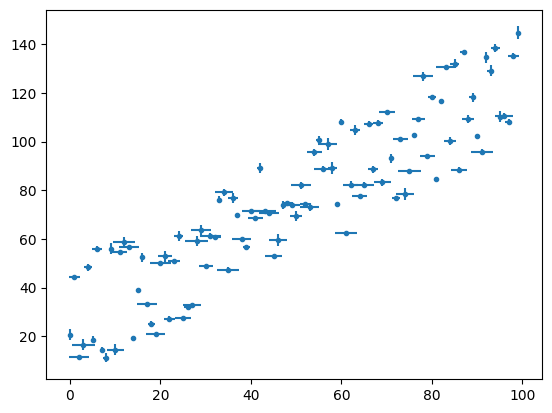

In [5]:
plt.errorbar(
    df['x'],
    df['y'],
    yerr=df['yerr'],
    xerr=df['xerr'],
    fmt='.'
)

3D Plots with Color Bars

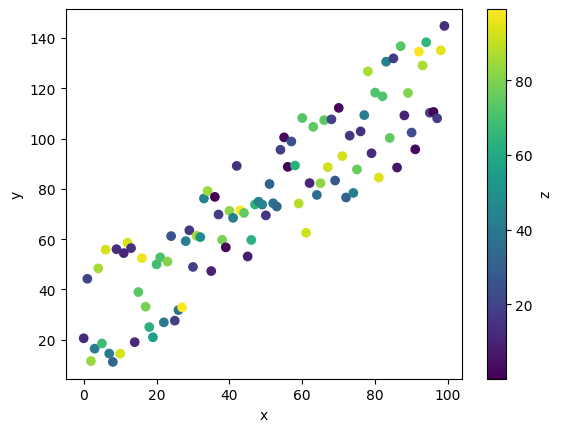

In [6]:
plt.scatter(
    df['x'],
    df['y'],
    c=df['z']
)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.set_label('z')

## Pandas
pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

Lets recreate the graph we just saw in the tutorial slides!

We can import the data using `pd.read_csv`.
```python
df = pd.read_csv('file.csv')
```

In [8]:
# Read in Harris Part 2 and 3
harris_p2 = pd.read_csv('Data Folder/HarrisPartII.csv')
harris_p3 = pd.read_csv('Data Folder/HarrisPartIII.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Data Folder/HarrisPartII.csv'

To quickly get some info on the dataset, we can use: `head` method, which retrieve the first 5 columns of the dataframe
```python
df.head()
```

In [ ]:
# Let us quickly have a look at what our data looks like

We can access a specific column using `[]`
```python
df['column_name']
```

In [ ]:
# Lets checkout the visual magnitude of harris_p2

In [ ]:
# Lets recreate the graph
# Convert the column to a number and make any errors NaN (Not A Number)
harris_p2['M_V,t'] = pd.to_numeric(harris_p2['M_V,t'], errors='coerce')

# Plot the data
plt.plot(
    harris_p2['M_V,t'],
    harris_p3['sig_v'],
    'x',
    label='globular clusters'
)

# Label the data 
plt.title(r'$\sigma$ vs $M_v$')
plt.xlabel('$M_v$ (mags)')
plt.ylabel('$\sigma$ (km/s)')
plt.legend()

# Exercises

## 1) Write some markdown 

Write some markdown here

## 2) CATALOG OF PARAMETERS FOR MILKY WAY GLOBULAR CLUSTERS
### a) Import Harris 1 Data set and convert the metallicity column to numerical data
### b) Plot X vs Z for globular clusters for clusters with metallicity greater than 0.8 and less than 0.8. (Hint: Harris 1 has X, Y, Z coordinates while Harris 2 has metallicity)
### c) Count how many clusters have a metallicity greater than 0.8.

A description of the data can be found in [Catalogue of Parameters for Milky Way Clusters by Harris](https://physics.mcmaster.ca/~harris/mwgc.dat) and [The Ages of 55 Globular Clusters as Determined Using an Improved \Delta V^HB_TO Method along with Color-Magnitude Diagram Constraints, and Their Implications for Broader Issues](https://ui.adsabs.harvard.edu/abs/2013ApJ...775..134V/abstract)  
Velocity Dispersion:https://astronomy.swin.edu.au/cosmos/v/Velocity+Dispersion  
Absolute Magnitude:https://astronomy.swin.edu.au/cosmos/A/Absolute+Magnitude  
Half Light Radius:https://astronomy.swin.edu.au/cosmos/H/Half-light+Radius

In [ ]:
# 2) a)

In [ ]:
# 2) b)

In [ ]:
# 2) c)

## 3) The Ages of 55 Globular Clusters as Determined Using an Improved \Delta V^HB_TO Method along with Color-Magnitude Diagram Constraints, and Their Implications for Broader Issues
### a) Merge Harris 1 and vanderBurg together to one dataframe and save it
### b) How many globular clusters are common between the two surveys?



Hint for these exercises, you will need a bit more help.

Hint 1: vandenBurg stores the NGC id (New General Catalogue) (i.e. 111 means NGC 111)  
Hint 2:
Let's consider the two dataframes.
They share data regarding the same star, but have slightly different naming conventions that makes it hard to consolidate.

Dataframe 1:
| id          | height      |
| ----------- | ----------- |
| 1           | 1           |
| 2           | 2           |
| 3           | 3           |

Dataframe 2:

| star_id | height |
|---------|--------|
| Star 1  | 1      |
| Star 2  | 2      |
| Star 4  | 4      |

In [ ]:
df1 = pd.DataFrame({
    'id': ['1', '2', '3'],
    'height': ['1', '2', '3']
})
df2 = pd.DataFrame({
    'star_id': ['Star 1', 'Star 2', 'Star 4'],
    'width': ['1', '2', '4']
})

To merge these two dataframes we need to complete a few operations:
1. Rename the column to be the same name to allow for the join
2. Update `id` column to mean the same format `Star X`
3. Save the dataframe

To rename columns, we can use 
`df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)`

In [ ]:
# renaming the columns in df1 to be 'star_id`
df1.rename(columns={'id': 'star_id'}, inplace=True)
df1

Apply an operation using `apply` method `df['column'] = df['column'].apply(func))`

In [ ]:
# Add Star to the start of the id column for dataframe 1 to match dataframe 2
def add_star(s):
    return "Star " + s
df1['star_id'] = df1['star_id'].apply(add_star)
df1

Merge dataframes on common column using `pd.merge`
Example: `df = pd.merge(df1, df2, on='star_id')`

In [ ]:
# Merge the two dataframes on 'star_id'
df = pd.merge(df1, df2, on='star_id')
df

Save to csv file for later using `df.to_csv('file_name.csv, index=False)`

In [ ]:
# Save id
df.to_csv('dataframe.csv', index=False)

In [ ]:
# 3) a)

In [ ]:
# 3) b)